In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import glob
from itertools import permutations,combinations
from collections import Counter
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.getcwd()
path = os.getcwd()+'/SalesAnalysis/Sales_Data'
os.chdir(path)
os.listdir()

'/Users/jasonchau/Downloads/Pandas-Data-Science-Tasks-master'

['Sales_December_2019.csv',
 '.DS_Store',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
# concat all months data into 1 df
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


In [4]:
df = frame.copy()
df.head()
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
# Check missing data
df

for col in df.columns:
    percentage_missing = df[col].isnull().mean()
    print("{} - {}%".format(col,percentage_missing))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


Order ID - 0.002916778164302917%
Product - 0.002916778164302917%
Quantity Ordered - 0.002916778164302917%
Price Each - 0.002916778164302917%
Order Date - 0.002916778164302917%
Purchase Address - 0.002916778164302917%


In [6]:
# There are missing data
# There are header data
# remove them

df = df[df['Order ID']!='Order ID']

df.sort_values(by='Order ID',ascending=True).head()
df[df['Order ID']=='Order ID'].count()

df.isnull().sum()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
137448,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
137449,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
137450,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
137451,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
137452,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
new_df = df.dropna()

In [8]:
len(new_df)-len(df)
df = new_df

-545

In [9]:
df.head()
print('missing data')
for col in df.columns:
    percentage_missing = df[col].isnull().mean()
    print("{} - {}%".format(col,percentage_missing))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


missing data
Order ID - 0.0%
Product - 0.0%
Quantity Ordered - 0.0%
Price Each - 0.0%
Order Date - 0.0%
Purchase Address - 0.0%


In [10]:
path = '/Users/jasonchau/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
os.chdir('/Users/jasonchau/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output')
df.reset_index(drop=True).to_csv('merged_data.csv')
os.chdir(path)

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
# create a column name year_month

df['year_month'] = df['Order Date'].dt.strftime("%Y-%m")

In [13]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06


In [14]:

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12


# Q1. What was the best month for sales? How much was earned that month?

In [15]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
year_month                  object
dtype: object

In [16]:
# change dtype for easy calculation
df['total_sales'] = df['Price Each'] * df['Quantity Ordered']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95


In [17]:
sales_by_month = df.groupby('year_month')\
.sum('total_sales').sort_values(by='total_sales',ascending=False)
sales_by_month.head()

,Quantity Ordered,Price Each,total_sales
year_month,,,
2019-12,28114,4588415.41,4613443.34
2019-10,22703,3715554.83,3736726.88
2019-04,20558,3367671.02,3390670.24
2019-11,19798,3180600.68,3199603.20
2019-05,18667,3135125.13,3152606.75


<AxesSubplot:xlabel='year_month'>

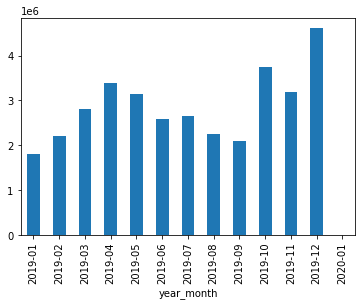

In [18]:
sales_by_month['total_sales'].sort_index().plot(kind='bar')

# Q2. What city sold the most product?

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95


In [20]:
# create a city coulumn 
df['city'] = df['Purchase Address'].apply( lambda x : x.split(',')[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99,Boston
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99,New York City
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95,San Francisco
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95,San Francisco


In [21]:
city_df = df.groupby('city').sum().sort_values("Quantity Ordered",ascending=False)
city_df

,Quantity Ordered,Price Each,total_sales
city,,,
San Francisco,50239,8211461.74,8262203.91
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Atlanta,16602,2779908.20,2795498.58
Seattle,16553,2733296.01,2747755.48
Portland,14053,2307747.47,2320490.61
Austin,11153,1809873.61,1819581.75


<AxesSubplot:xlabel='city', ylabel='Quantity Ordered'>

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

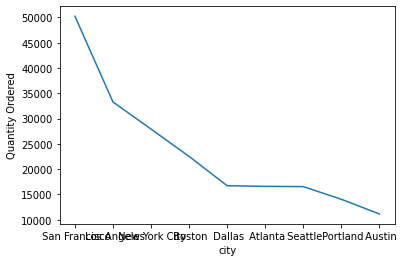

In [22]:
sns.lineplot(data=city_df,x='city',y='Quantity Ordered')
plt.tight_layout

In [23]:
# San Francisco sold the most products

# Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [24]:
df['year_month_day'] = df['Order Date'].dt.strftime("%Y-%m-%d")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales,city,year_month_day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00,New York City,2019-12-30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00,New York City,2019-12-29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95,New York City,2019-12-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99,San Francisco,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95,Atlanta,2019-12-18
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99,Boston,2019-06-07
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99,New York City,2019-06-01
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95,San Francisco,2019-06-22
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95,San Francisco,2019-06-26


<AxesSubplot:xlabel='year_month_day', ylabel='total_sales'>

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

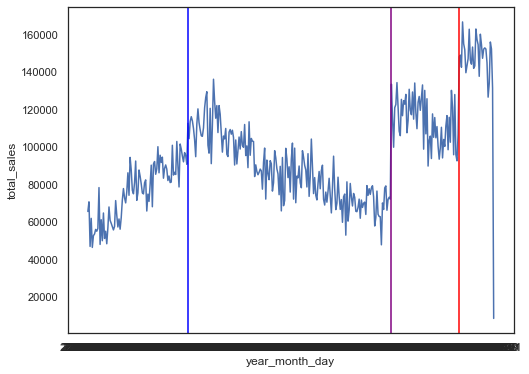

In [25]:
sdf = df.groupby('year_month_day').sum().sort_values(by='year_month_day')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("white")
sns.lineplot(data=sdf,x='year_month_day',y='total_sales')
plt.tight_layout
plt.axvline(x='2019-12-01',color='red',label='2019-12-01')
plt.axvline(x='2019-04-01',color='blue',label='2019-04-01')
plt.axvline(x='2019-10-01',color='purple',label='2019-10-01')

In [26]:
# start ad before 1st April, 1st Oct and 1st Dec 

# Q4. What products are most often sold together?

In [27]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales,city,year_month_day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00,New York City,2019-12-30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00,New York City,2019-12-29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95,New York City,2019-12-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99,San Francisco,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95,Atlanta,2019-12-18
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99,Boston,2019-06-07
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99,New York City,2019-06-01
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95,San Francisco,2019-06-22
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95,San Francisco,2019-06-26


In [28]:
gdf = df[df['Order ID'].duplicated(keep=False)]
gdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales,city,year_month_day
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,600.00,Boston,2019-12-25
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,11.95,Boston,2019-12-25
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,99.99,Boston,2019-12-25
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,11.99,Boston,2019-12-25
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12,400.00,New York City,2019-12-13


In [29]:
gdf['grouped'] = gdf.groupby('Order ID')['Product'].transform(lambda x:",".join(x))
gdf.head()

/var/folders/xm/pdtg6pzd1yx5n1l8ylz52k3w0000gn/T/ipykernel_82793/619080654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['grouped'] = gdf.groupby('Order ID')['Product'].transform(lambda x:",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year_month,total_sales,city,year_month_day,grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,600.00,Boston,2019-12-25,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,11.95,Boston,2019-12-25,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,99.99,Boston,2019-12-25,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12,11.99,Boston,2019-12-25,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12,400.00,New York City,2019-12-13,"Vareebadd Phone,USB-C Charging Cable"


In [30]:
gdf.drop_duplicates('Order ID',inplace=True)
gdf.value_counts('grouped')

/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
                                                     ... 
LG Dryer,27in FHD Monitor                               1
LG Dryer,27in 4K Gaming Monitor                         1
Google Phone,Wired Headphones,USB-C Charging Cable      1
Google Phone,Wired Headphones,Macbook Pro Laptop        1
iPhone,iPhone                                           1
Length: 366, dtype: int64

In [31]:
count = Counter()

for row in  gdf['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [32]:
# so the most bought tgt items are 
# 1. ('iPhone', 'Lightning Charging Cable')
# 2. ('Google Phone', 'USB-C Charging Cable') 987
# makse sense

# Q5.  What product sold the most? Why do you think it sold the most?

In [33]:
df.groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Price Each,total_sales
Product,,,
AAA Batteries (4-pack),31017,61716.59,92740.83
AA Batteries (4-pack),27635,79015.68,106118.40
USB-C Charging Cable,23975,261740.85,286501.25
Lightning Charging Cable,23217,323787.10,347094.15
Wired Headphones,20557,226395.18,246478.43
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
27in FHD Monitor,7550,1125974.93,1132424.50
iPhone,6849,4789400.00,4794300.00


In [34]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [35]:
tpc_df = df[df['Product'] == 'USB-C Charging Cable']

In [36]:
tpc_df.describe()

,Quantity Ordered,Price Each,total_sales
count,21903.000000,21903.00,21903.000000
mean,1.094599,11.95,13.080457
std,0.323634,0.00,3.867425
min,1.000000,11.95,11.950000
25%,1.000000,11.95,11.950000
50%,1.000000,11.95,11.950000
75%,1.000000,11.95,11.950000
max,6.000000,11.95,71.700000


In [37]:
#most people buy just 1 cable at a time

<AxesSubplot:xlabel='year_month'>

<AxesSubplot:xlabel='year_month'>

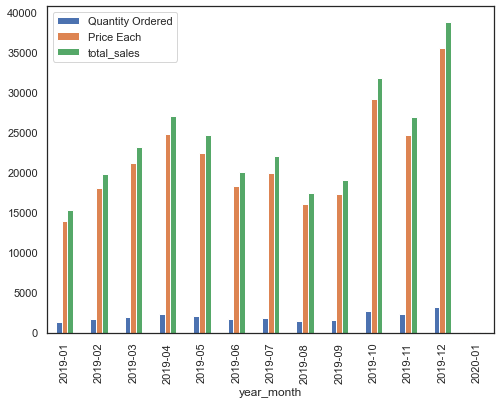

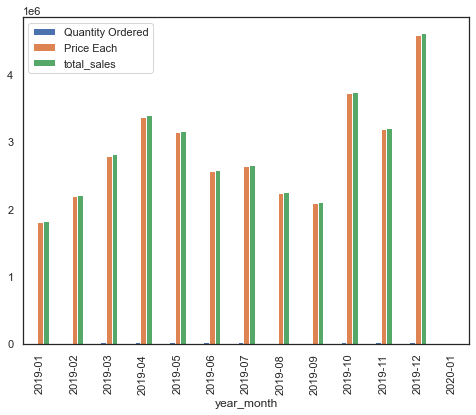

In [38]:
tpc_df.groupby('year_month').sum().plot(kind='bar')
df.groupby('year_month').sum().plot(kind='bar')


In [39]:
# the cable sales pattern is similar to total products sales, 
# so it is not a seasonal products or stand alone figure

0.2450805825685979
0.15769529288225356
0.13596311007624526
0.10651508925717938
0.08094781536775784
0.07779756197781126
0.07720403597680683
0.06656622380495822
0.05223028808838972


<AxesSubplot:>

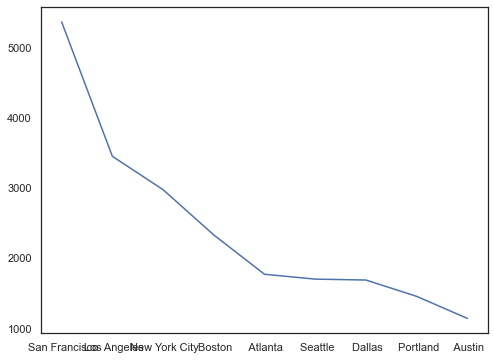

In [40]:
for i in tpc_df['city'].value_counts():
    print (i/tpc_df['city'].count())
tpc_df['city'].value_counts().plot()

0.24055929013175584
0.15920946490992202
0.13377789728421619
0.10720086044635654
0.08002688894864211
0.07969884377520839
0.07922559827910729
0.06703414896477548
0.05326700726001613


<AxesSubplot:>

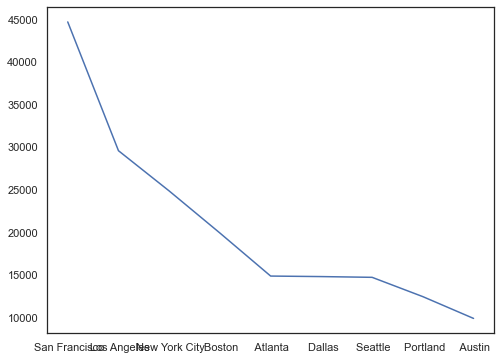

In [41]:

for i in df['city'].value_counts():
    print (i/df['city'].count())
df['city'].value_counts().plot()

<AxesSubplot:>

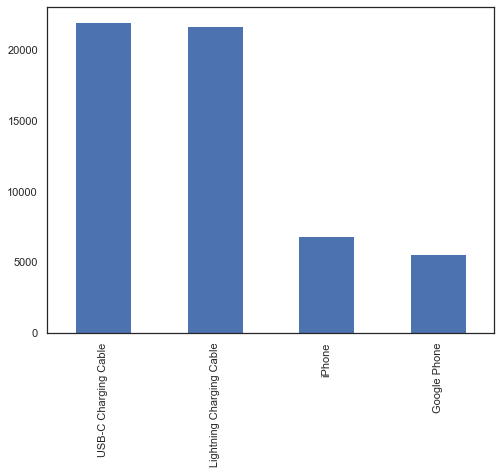

In [42]:
df['Product'][df['Product'].isin(['USB-C Charging Cable','Google Phone','iPhone','Lightning Charging Cable',])].value_counts().plot(kind='bar')

In [43]:
grouped_df = df.groupby('Product').sum().reset_index().sort_values(by='Quantity Ordered',ascending=False)
prices_df = df.groupby('Product').mean().reset_index()

<AxesSubplot:xlabel='Product', ylabel='Quantity Ordered'>

<AxesSubplot:xlabel='Product', ylabel='Price Each'>

Text(0, 0.5, 'Quantity Ordered')

Text(0, 0.5, 'Unit Price')

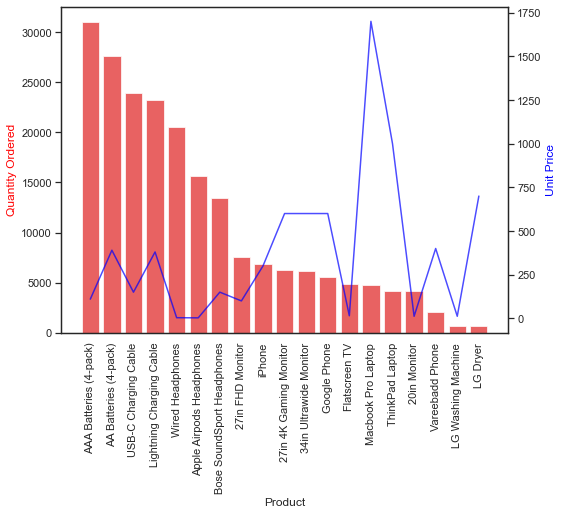

In [44]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.barplot(data=grouped_df,x='Product',y='Quantity Ordered',ax=ax1,color='red',alpha=0.7)
sns.lineplot(data=prices_df,x='Product',y='Price Each',ax=ax2,color='blue',alpha=0.7)

ax1.set_ylabel('Quantity Ordered',color='red')
ax2.set_ylabel('Unit Price',color='blue')

ax1.tick_params(axis='x', rotation=90)